# Level-1

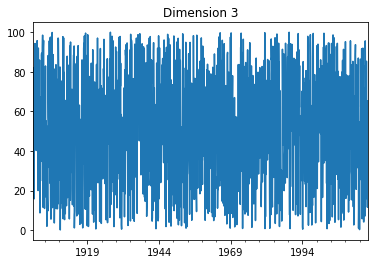

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_data(input_file, index):
    # Read the data from the input file
    input_data = np.loadtxt(input_file, delimiter=',')

    # Lambda function to convert strings to Pandas date format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))

    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])

    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1

    end = to_date(year, month)

    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='M')

    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)

    return output 

if __name__=='__main__':
    # Input filename
    input_file = 'data_2D.txt'

    # Convert the column to timeseries format
    timeseries = read_data(input_file, 3)

    # Plot the data
    plt.figure()
    timeseries.plot()
    plt.title('Dimension ' + str(3))

    plt.show()

# Level-2

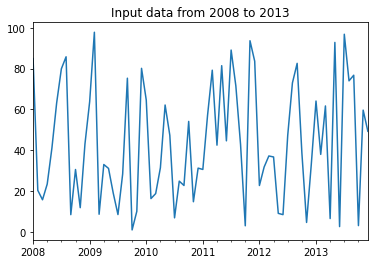

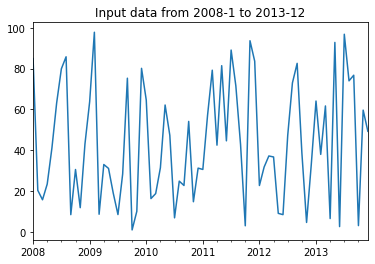

In [5]:
# Load input data
index = 2
data = read_data('data_2D.txt', index)

# Plot data with year-level granularity 
start = '2008'
end = '2013'
plt.figure()
data[start:end].plot()
plt.title('Input data from ' + start + ' to ' + end)

# Plot data with month-level granularity 
start = '2008-1'
end = '2013-12'
plt.figure()
data[start:end].plot()
plt.title('Input data from ' + start + ' to ' + end)

plt.show()

# Level-3

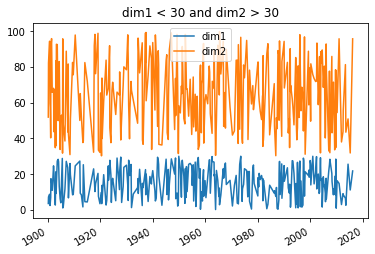

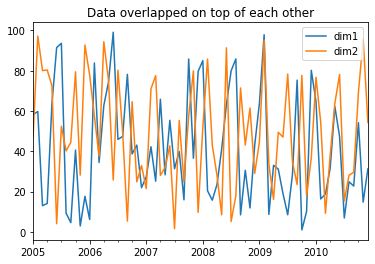

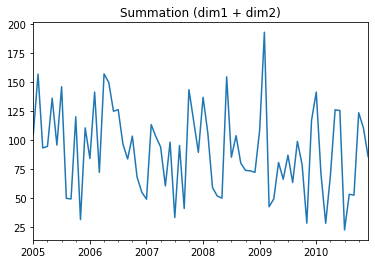

In [2]:
# Input filename
input_file = 'data_2D.txt'

# Load data
x1 = read_data(input_file, 2)
x2 = read_data(input_file, 3)

# Create pandas dataframe for slicing
data = pd.DataFrame({'dim1': x1, 'dim2': x2})

# Filtering using conditions
# - 'dim1' is smaller than a certain threshold
# - 'dim2' is greater than a certain threshold
data[(data['dim1'] < 30) & (data['dim2'] > 30)].plot()
plt.title('dim1 < 30 and dim2 > 30')


# Plot data
start = '2005'
end = '2010'
data[start:end].plot()
plt.title('Data overlapped on top of each other')

# Adding two dataframes 
plt.figure()
diff = data[start:end]['dim1'] + data[start:end]['dim2']
diff.plot()
plt.title('Summation (dim1 + dim2)')

plt.show()


Maximum values for each dimension:
dim1    99.98
dim2    99.97
dtype: float64

Minimum values for each dimension:
dim1    0.18
dim2    0.16
dtype: float64

Overall mean:
dim1    49.030541
dim2    50.983291
dtype: float64

Correlation coefficients:
          dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


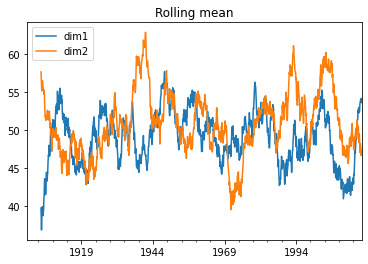

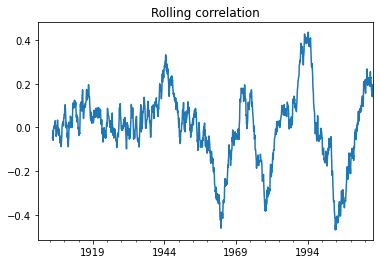

In [6]:
# Extract max and min values
print('\nMaximum values for each dimension:')
print(data.max())
print('\nMinimum values for each dimension:')
print(data.min())

# Extract overall mean and row-wise mean values
print('\nOverall mean:')
print(data.mean())

# Extract correlation coefficients
print('\nCorrelation coefficients:\n', data.corr())

# Plot the rolling mean using a window size of 60
data.rolling(center=False, window=60).mean().plot()
plt.title('Rolling mean')

# Plot rolling correlation using a window size of 60
plt.figure()
plt.title('Rolling correlation')
data['dim1'].rolling(window=60).corr(other=data['dim2']).plot()

plt.show()